In [25]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
%matplotlib inline

from sklearn import decomposition


In [32]:
df = pd.read_csv('aggregated_train_NumMosquito_no_strings.csv')
string_features = ['Date','Address','Street','AddressNumberAndStreet','CodeSum']

X = df.drop('WnvPresent',axis=1).copy()
X = X.drop(string_features,axis=1)
X.Month.values.min(), X.Month.values.max()
y = df.WnvPresent
y.dtypes

dtype('int64')

/home/thomas/anaconda3/lib/python3.4/site-packages/IPython/kernel/__main__.py:14: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index
/home/thomas/anaconda3/lib/python3.4/site-packages/IPython/kernel/__main__.py:15: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index
/home/thomas/anaconda3/lib/python3.4/site-packages/IPython/kernel/__main__.py:16: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index


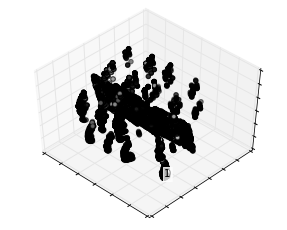

In [33]:
fig = plt.figure(1, figsize=(4, 3))
plt.clf()

ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
pca = decomposition.PCA(n_components=5)
pca.fit(X)


X = pca.transform(X)



for name, label in [(0, 0), (1, 1)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.spectral)

x_surf = [X[:, 0].min(), X[:, 0].max(),
          X[:, 0].min(), X[:, 0].max()]
y_surf = [X[:, 0].max(), X[:, 0].max(),
          X[:, 0].min(), X[:, 0].min()]
x_surf = np.array(x_surf)
y_surf = np.array(y_surf)
v0 = pca.transform(pca.components_[0])
v0 /= v0[-1]
v1 = pca.transform(pca.components_[1])
v1 /= v1[-1]

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()
